In [2]:
%pylab inline
f = np.logspace(-5,-1,1000)
v_w = 0.44
alphaT_star = 0.084
Hbeta_rate = 0.1
g_star = 106.75
T_star = 180
h_star = 16.5*1E-6*(T_star/100)*(g_star/100)**(1./6)
f_turb = 27*1E-6*(1/v_w)*Hbeta_rate*(T_star/100)*(g_star/100)**(1./6)
f_rate = f/f_turb
S_turb = (f_rate)**3/((1+f_rate)**(11./3)*(1+8*np.pi*f/h_star))

Populating the interactive namespace from numpy and matplotlib


/Users/zhonghaowen/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['beta', 'gamma']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


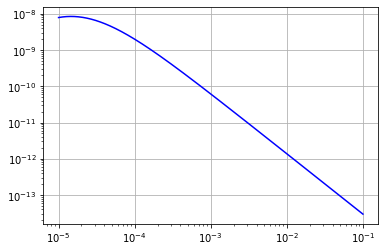

In [26]:
import seaborn
kappa = 1.0
Result = 3.35E-4*Hbeta_rate*(kappa*alphaT_star/(1+alphaT_star)**1.5)*(100/g_star)**(1./3)*v_w*S_turb
plt.loglog(f,Result,color="blue")
plt.grid()

Populating the interactive namespace from numpy and matplotlib


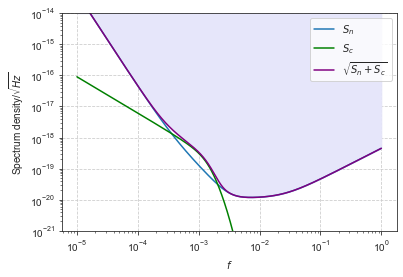

In [1]:
#LISA-4yr
%pylab inline
import seaborn as sns
sns.set_style("ticks")
L = 2.5E9
f_star = 19.09E-3
alpha= 0.138
beta = -221
kappa = 521
gamma = 1680
f_k = 0.00113
f = np.logspace(-5,0,1000)
A = 9E-45
P_OMS = (1.5E-11)**2*(1+(2E-3/f)**4)
P_acc = (3E-15)**2*(1+(0.4E-3/f)**2)*(1+(f/8E-3)**4)
P_n = P_OMS/L**2+2*(1+np.cos(f/f_star)**2)*P_acc/((2*np.pi*f)**4*L*L)
S_c = A*f**(-7./3)*np.exp(-f*alpha+beta*f*np.sin(kappa*f))*(1+np.tanh(gamma*(f_k-f)))
S_n = 10/(3*L*L)*(P_OMS+4*P_acc/(2*np.pi*f)**4)*(1+6./10*(f/f_star)**2)
plt.loglog(f,np.sqrt(S_n),label="$S_n$")
plt.loglog(f,np.sqrt(S_c),color="green",label="$S_c$")
plt.loglog(f,np.sqrt(S_n+S_c),color="purple",label="$\sqrt{S_n+S_c}$")
plt.fill_between(f,np.sqrt(S_n+S_c),1E-14,color="Lavender")
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 10,
        }
font2 = {'family' : 'Helvetica',
'weight' : 'normal',
'size'   : 10,
        }
plt.xlabel("$f$",font2)
plt.ylabel("Spectrum density/$\sqrt{Hz}$",font2)
plt.legend(prop=font1)
plt.grid(linestyle="--")
plt.ylim(1E-21,1E-14)
plt.savefig("LISA.png",dpi=800)

In [63]:
#Scalar Field Contribution
beta_H = 12.54 
kappa = 
alpha = 0.17
g_star = 
v_w = 1
T_star = 59.6
f_star/beta=0.62/(1.8-0.1*v_w+v_w**2)
f_env = 16.5E-6*(f_star/beta)/Hbeta*(T_star/100E9)*(g_star/100)**1./6
S_env = 3.8*(f/f_env)**2.8/(1+2.8*(f/f_env)**3.8)
h2Omega_env = 1.67E-5*

### 这里我们需要用到数值的二重积分，因此首先看几个例子学习下
#### dblquad(func, a, b, gfun, hfun, args=(), epsabs=1.49e-08, epsrel=1.49e-08)
这就是scipy自带的二重积分包，我们可以看到
* func是我们需要输入的被积函数
* a,b是外层被积函数的上下限
* gfun,hfun 是内层被积函数的上下限，是函数的形式可以用lambda写函数
* 其他参数我们目前用不到
这里一定要注意，函数的定义是有要求的：
* func(y, x) from x = a..b and y = gfun(x)..hfun(x).


* funccallable:A Python function or method of at least two variables: y must be the first argument and x the second argument.


* a, bfloat:The limits of integration in x: a < b


* gfuncallable or float:The lower boundary curve in y which is a function taking a single floating point argument (x) and returning a floating point result or a float indicating a constant boundary curve.


* hfuncallable or float:The upper boundary curve in y (same requirements as gfun).


* argssequence, optional: Extra arguments to pass to func.

In [10]:
import numpy as np  
from scipy.integrate import tplquad,dblquad,quad
val2,err2=dblquad(lambda y,x:np.sin(x)*np.cos(y),#函数
                  0,#x下界0
                  np.pi,#x上界pi
                  lambda x:x**2,#y下界x^2
                  lambda x:2*x)#y上界2*x
print ('二重积分结果：',val2)

二重积分结果： -0.4989998520503062


In [1]:
%pylab inline
pi = np.pi
from scipy.special import jv
from scipy.special import spherical_jn
#经过检查这是对的
def F_0(r,t_d):
    return 2*(r**2-t_d**2)**2*(r**2+6*r+12)
#经过检查这是对的
def F_1(r,t_d):
    F_1 = 2*(r**2-t_d**2)*(-r**2*(r**3+4*r**2+12*r+24)\
           +t_d**2*(r**3+12*r**2+60*r+120))
    return F_1
#经过检查这是对的
def F_2(r,t_d):
    return 0.5*(r**4*(144+r*(72+r*(20+r*(4+r))))\
                -2*t_d**2*r**2*(720+r*(360+r*(84+r*(12+r))))\
                +t_d**4*(1680+r*(840+r*(180+r*(20+r)))))
#经过检查这是对的
def I(r,t_d):
    return 2*np.cosh(t_d/2)+np.exp(-r/2)*(t_d**2-r**2-4*r)/(4*r)
def integrand(r,t_d,k):
    dDelta_s = k**3/(12*pi)*np.exp(-r/2)*np.cos(k*t_d)/(r**3*I(r,t_d))\
           *(spherical_jn(0,k*r)*F_0(r,t_d)+spherical_jn(1,k*r)/(k*r)*F_1(r,t_d)\
             +spherical_jn(2,k*r)/(k*r)**2*F_2(r,t_d))
#     if dDelta_s<1E-16:
#         dDelta_s=0
    return dDelta_s

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from scipy.integrate import tplquad,dblquad,quad,nquad
k = np.linspace(1,1000,1000)
result =[]
options={'limit':100}
for temp_k in k:
    result.append(dblquad(integrand,0, 50,lambda t_d:t_d,50,args=(temp_k,)))
print(result)

/Users/zhonghaowen/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:860: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  **opt)
/Users/zhonghaowen/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:860: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  **opt)


In [ ]:
result = np.array(result)

In [ ]:
plt.loglog(result[:,0])
plt.yticks([1E-8,1E-6,1E-4,1E-2,1],["$10^{-8}$","$10^{-6}$","$10^{-4}$",0.01,"1"])

In [ ]:
spherical_jn(0,0)

In [5]:
nquad?

In [347]:
%pylab inline
from scipy.integrate import tplquad,dblquad,quad,nquad
from scipy.special import jv
from scipy.special import spherical_jn
pi = np.pi
sin = np.sin
cos = np.cos
exp = np.exp
def F_0(r,t):
    return 2*(r*r - t*t)*(r*r - t*t)*(r*(r + 6) + 12)
def F_1(r,t):
    return 2*(r*r - t*t)*(- r*r*(r*(r*(r + 4) + 12) + 24) + t*t*(r*(r*(r + 12) + 60) + 120))
def F_2(r,t):
    return 0.5*(r*r*r*r*(r*(r*(r*(r + 4) + 20) + 72) + 144) -\
                2*r*r*t*t*(r*(r*(r*(r + 12) + 84) + 360) + 720) +\
                t*t*t*t*(r*(r*(r*(r + 20) + 180) + 840) + 1680))
def I(r,t):
    return exp(t/2) + exp(-t/2) + exp(-r/2)*(t*t - r*(r + 4))/(4*r)
#0阶球贝塞尔函数                   
def j0(x):
    if x<0.001:
        return 1
    else:
        return sin(x)/x
#j1(x)/x
def j1(x):
    if x<0.001:
        return 1/3
    else:
        return (sin(x)-x*cos(x))/(x*x*x)
#j2(x)/x^2
def j2(x):
    if x<0.001:
        return 1/15
    else:
        return ((3-x*x)*sin(x)-3*x*cos(x))/(x*x*x*x*x)
def integrand_1(r,t,k):
    dDelta_s = exp(-r/2)*cos(k*t)/(r*r*r)/I(r,t)*(j0(k*r)*F_0(r,t)+j1(k*r)*F_1(r,t)+j2(k*r)*F_2(r,t))
    return dDelta_s
def G(r,t):
    return (r**2-t**2)*(r*r*(2+r)+t*(r*r+6*r+12))
def integrand_2(r,t,k):
    dDelta_d = exp(-r)*cos(k*t)/(r*r*r*r*I(r,t)*I(r,t))*j2(k*r)*G(r,t)*G(r,-t)
    return dDelta_d

Populating the interactive namespace from numpy and matplotlib


In [293]:
import time
k1 = np.logspace(-3,1,50)
temp_result_1=[]
time_history = []
for k in k1:
    time_begin = time.time()
    delta_s,error_1 = dblquad(integrand_1,0, 100,lambda t:t,100,args=(k,),epsrel=0.01)
    delta_s,error_1 = (k*k*k/12/pi*delta_s,k*k*k/12/pi*erro_1)
    temp_result_1.append((k,delta_s,error_1))
    time_end = time.time()
    time_history.append(time_end-time_new)
print("Calcultion is finished")

Calcultion is finished


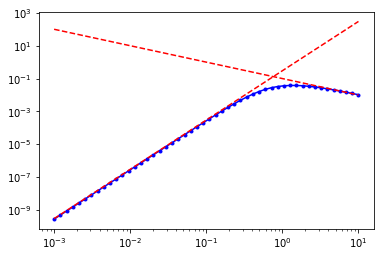

In [368]:
result_s = np.array(temp_result_1)
time_s = np.array(time_history)
plt.loglog(result_s[:,0],result_s[:,1],"b-")
plt.loglog(result_s[:,0],result_s[:,1],"b.")
plt.loglog(result_s[:,0],0.3*result_s[:,0]**3,"r--")
plt.loglog(result_s[:,0],0.1/result_s[:,0],"r--")

In [344]:
import time
k2 = np.logspace(1,2,50)
temp_result_2=[]
for k in k2:
    delta_s,error_1 = dblquad(integrand_1,0, 5,lambda t:t,5,args=(k,),epsrel=0.001)
    temp_result_2.append((k,delta_s,error_1))
print("Calcultion of k2 is finished")

Calcultion of k2 is finished


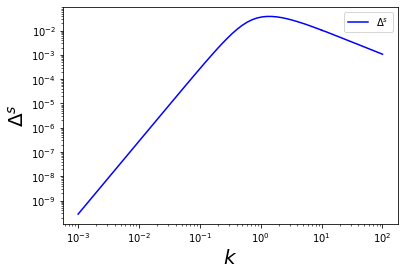

In [346]:
result_s_1 = np.array(temp_result_1)
result_s_2 = np.array(temp_result_2)
plt.loglog(result_s_1[:,0],result_s_1[:,1],"b-",label=r"$\Delta^s$")
plt.loglog(result_s_2[:,0],result_s_2[:,1],"b-")
plt.xlabel("$k$",fontsize=20)
plt.ylabel(r"$\Delta^s$",fontsize=20)
plt.legend()
plt.savefig("small_k_Delta_s.png",dpi=500)

Calcultion of k1 is finished
Calcultion of k2 is finished


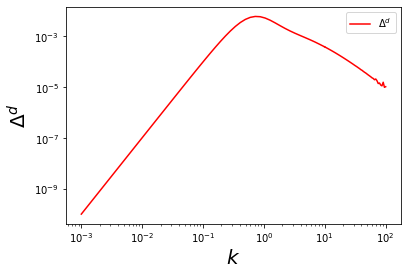

In [349]:
import time
k1 = np.logspace(-3,1,50)
k2 = np.logspace(1,2,50)
temp_result_d1=[]
temp_result_d2=[]
for k in k1:
    delta_d = dblquad(integrand_2,0, 100,lambda t:t,100,args=(k,),epsrel=0.01)[0]
    delta_d = k*k*k/96/pi*delta_d
    temp_result_d1.append((k,delta_d))
print("Calcultion of k1 is finished")
for k in k2:
    delta_d = dblquad(integrand_2,0, 5,lambda t:t, 5,args=(k,),epsrel=0.001)[0]
    delta_d = k*k*k/96/pi*delta_d
    temp_result_d2.append((k,delta_d))
print("Calcultion of k2 is finished")

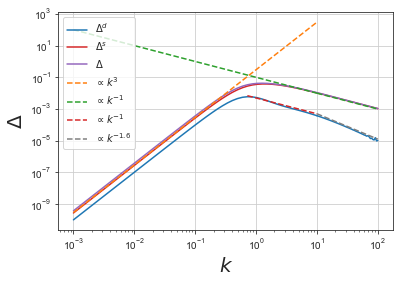

In [407]:
import seaborn as sns
sns.set_style("ticks")
result_d_1 = np.array(temp_result_d1)
result_d_2 = np.array(temp_result_d2)
plt.loglog(result_d_1[:,0],result_d_1[:,1],"-",color="tab:blue",label=r"$\Delta^d$")
plt.loglog(result_d_2[:,0],result_d_2[:,1],"-",color="tab:blue")
result_s_1 = np.array(temp_result_1)
result_s_2 = np.array(temp_result_2)
plt.loglog(result_s_1[:,0],result_s_1[:,1],"-",color="tab:red",label=r"$\Delta^s$")
plt.loglog(result_s_2[:,0],result_s_2[:,1],"r-",color="tab:red")
plt.loglog(result_s_1[:,0],result_s_1[:,1]+result_d_1[:,1],"-",color="tab:purple",label=r"$\Delta$")
plt.loglog(result_s_2[:,0],result_s_2[:,1]+result_d_2[:,1],"-",color="tab:purple")
plt.loglog(result_s_1[:,0],0.3*result_s_1[:,0]**3,"--",color="tab:orange",label="$\propto k^{3}$")
plt.loglog(result_s_2[:,0],0.1/result_s_2[:,0],"--",color="tab:green",label="$\propto k^{-1}$")
plt.loglog(result_s_1[:,0],0.1/result_s_1[:,0],"--",color="tab:green")
plt.loglog(result_d_1[-15:,0],0.005/result_d_1[-15:,0],"--",color="tab:red",label="$\propto k^{-1}$")
plt.loglog(result_d_2[:,0],0.02/result_d_2[:,0]**1.6,"--",color="tab:grey",label="$\propto k^{-1.6}$")
plt.xlabel("$k$",fontsize=20)
plt.ylabel(r"$\Delta$",fontsize=20)
plt.legend(loc='upper left')
plt.grid()
plt.savefig("total_Delta.png",dpi=500,bbox_inches='tight')

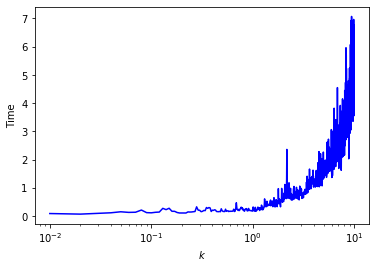

In [29]:
result_time = np.array(time_history)
plt.semilogx(k1,result_time[:],"b")
plt.xlabel(r'$k$')
plt.ylabel('Time')
plt.savefig("small_k_time.png",dpi=500)

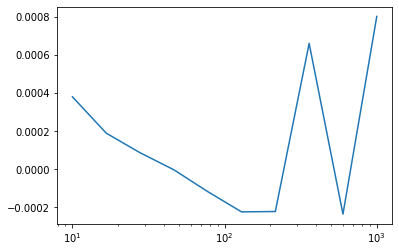

In [15]:
result = np.array(temp_result_2)
plt.semilogx(k2,result[:,0])

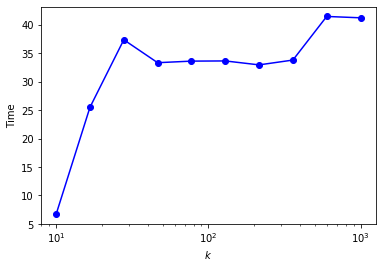

In [19]:
plt.semilogx(k2,time_history[:],"bo")
plt.semilogx(k2,time_history[:],"b-")
plt.xlabel(r'$k$')
plt.ylabel('Time')
plt.savefig("large_k.png",dpi=500)

In [190]:
data_d = []
data_s = []
for i in range(len(k1)):
    data_d.append([k1[i],result[i,0]])
    data_s.append([k1[i],result[i,0]])
np.savetxt('small_k_d.txt', data_d)   # 数组result
np.savetxt('small_k_s.txt', data_s)

In [191]:
data = np.genfromtxt('small_k_s.txt', names=True, dtype=None, encoding=None)

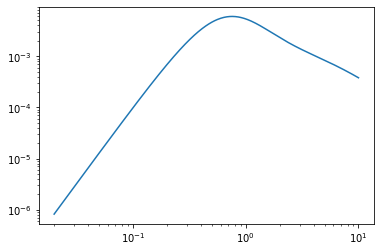

In [203]:
k= []
delta = []
for i in range(len(data)):
    k.append(data[i][0])
    delta.append(data[i][1])
plt.loglog(k,delta)

In [1]:
%pylab inline
sigma = np.linspace(0,1,100)
S3_sigma = 4*4.85*(1+sigma/4*(1+2.4/(1-sigma)+0.26/(1-sigma)**2))

Populating the interactive namespace from numpy and matplotlib


/Users/zhonghaowen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


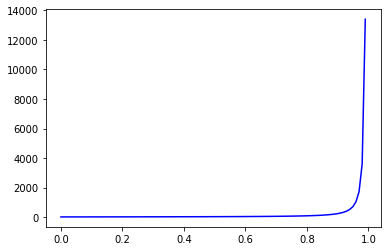

In [3]:
plt.plot(sigma,S3_sigma,color="blue")

Populating the interactive namespace from numpy and matplotlib


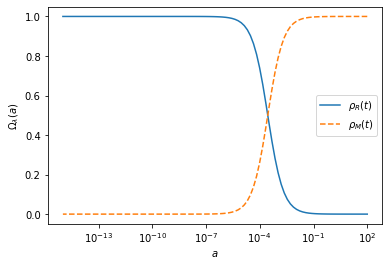

In [52]:
%pylab inline
a = np.logspace(2,-15,100)
rho_r = 4.184e-5*0.7**-2
rho_m = 0.308
rho_r_t = rho_r*a**-4
rho_m_t = rho_m*a**-3
rho_tot = rho_r_t + rho_m_t
plt.semilogx(a,rho_r_t/rho_tot,"-",label=r"$\rho_R(t)$")
plt.semilogx(a,rho_m_t/rho_tot,"--",label=r"$\rho_M(t)$")
plt.xlabel(r"$a$")
plt.ylabel(r"$\Omega_\lambda(a)$")
plt.legend()

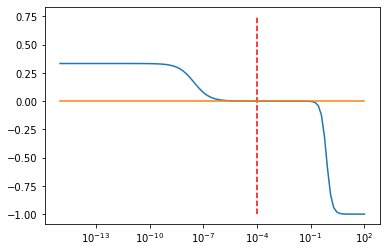

In [50]:
Omega_M = 0.308
Omega_R = 4.184e-5*67**-2
Omega_L = 1 - Omega_M - Omega_R
w = (1/3*Omega_R*a**-4 - Omega_L)/(Omega_R*a**-4 + Omega_M*a**-3 + Omega_L)
plt.vlines(0.0001, -1, 0.75, colors = "r", linestyles = "dashed")
plt.semilogx(a,w)
plt.semilogx(a,np.zeros(len(a)))

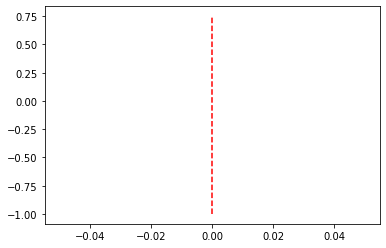

In [51]:
plt.vlines(0, -1, 0.75, colors = "r", linestyles = "dashed")